# Assignemt 1

In [435]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

random.seed(42)

## Problem 1

In [436]:
array = np.random.randint(1, 51, size=(5, 4))
print("Generated Array:")
print(array)

Generated Array:
[[34 33 47 21]
 [43  9 30 37]
 [ 7 21 18 28]
 [ 4 24  8 48]
 [33 48 33 43]]


### 1. Extract the anti-diagonal elements (top-right to bottom-left)

In [437]:
anti_diagonal = [array[i, -i - 1] for i in range(min(array.shape))]
print("\nAnti-Diagonal Elements:")
print(anti_diagonal)


Anti-Diagonal Elements:
[21, 30, 21, 4]


### 2. Compute and print the maximum value in each row

In [438]:
max_in_rows = np.max(array, axis=1)
print("\nMaximum Value in Each Row:")
print(max_in_rows)


Maximum Value in Each Row:
[47 43 28 48 48]


### 3. Create a new array with elements less than or equal to the mean

In [439]:
mean_value = np.mean(array)
filtered_array = array[array <= mean_value]
print(f"\nArray Mean: {mean_value}")
print("Filtered Array (elements <= mean): ", filtered_array)


Array Mean: 28.45
Filtered Array (elements <= mean):  [21  9  7 21 18 28  4 24  8]


### 4. Function to traverse the boundary in clockwise order

In [440]:
def numpy_boundary_traversal(matrix) -> list:
    top = matrix[0, :]
    right = matrix[1:-1, -1]
    bottom = matrix[-1, ::-1]
    left = matrix[-2:0:-1, 0]
    boundary_elements = np.concatenate([top, right, bottom, left])
    return boundary_elements.tolist()

In [441]:
boundary_elements = numpy_boundary_traversal(array)
print("\nBoundary Traversal (Clockwise): ", boundary_elements)


Boundary Traversal (Clockwise):  [34, 33, 47, 21, 37, 28, 48, 43, 33, 48, 33, 4, 7, 43]


## Problem 2

In [442]:
array = np.random.uniform(0, 10, 20)
print(array)

[0.96820256 1.69636923 9.86948693 3.33901789 4.45310799 9.04544532
 8.61379057 0.81801026 9.8525967  2.34230356 7.56664124 0.14040155
 6.18463853 7.96886496 8.68190111 9.9097908  6.80726812 5.75192917
 6.16346449 3.86594413]


### 1. Print the array rounded to 2 decimal places

In [443]:
print("Generated Array (rounded to 2 decimal places):")
array = np.round(array, 2)
print(array)

Generated Array (rounded to 2 decimal places):
[0.97 1.7  9.87 3.34 4.45 9.05 8.61 0.82 9.85 2.34 7.57 0.14 6.18 7.97
 8.68 9.91 6.81 5.75 6.16 3.87]


### 2. Calculate and print min, max and median

In [444]:
min_val = np.min(array)
max_val = np.max(array)
median_val = np.median(array)
print(f"\nMinimum: {min_val}, Maximum: {max_val}, Median: {median_val}")


Minimum: 0.14, Maximum: 9.91, Median: 6.17


### 3. Replace elements less than 5 with their squares

In [445]:
modified_array = np.array([x**2 if x < 5 else x for x in array])
print("\nArray after replacing elements less than 5 with their squares:")
print(np.round(modified_array, 2))


Array after replacing elements less than 5 with their squares:
[ 0.94  2.89  9.87 11.16 19.8   9.05  8.61  0.67  9.85  5.48  7.57  0.02
  6.18  7.97  8.68  9.91  6.81  5.75  6.16 14.98]


### 4. Function to sort in alternating pattern

In [446]:
def numpy_alternate_sort(array):
    sorted_array = np.sort(array)
    result = []
    left = 0
    right = len(sorted_array) - 1

    while left <= right:
        if left == right:
            result.append(sorted_array[left])
        else:
            result.append(sorted_array[left])
            result.append(sorted_array[right])
        left += 1
        right -= 1

    return np.array(result)

In [447]:
alternate_sorted_array = numpy_alternate_sort(array)
print("\nArray in Alternating Sort Pattern: ")
print(np.round(alternate_sorted_array, 2))


Array in Alternating Sort Pattern: 
[0.14 9.91 0.82 9.87 0.97 9.85 1.7  9.05 2.34 8.68 3.34 8.61 3.87 7.97
 4.45 7.57 5.75 6.81 6.16 6.18]


## Problem 3

In [448]:
students = [f'Student{i+1}' for i in range(10)]
subjects = ['Math', 'Science', 'History', 'English', 'Art']

data = {
    'Name': [],
    'Subject': [],
    'Score': [],
    'Grade': []
}

for student in students:
    for subject in subjects:
        score = np.random.randint(50, 101)
        data['Name'].append(student)
        data['Subject'].append(subject)
        data['Score'].append(score)
        data['Grade'].append('')

df = pd.DataFrame(data)

### Assign grades based on score

In [449]:
def assign_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

df['Grade'] = df['Score'].apply(assign_grade)
print("DataFrame with Grades:")
print(df)

DataFrame with Grades:
         Name  Subject  Score Grade
0    Student1     Math     80     B
1    Student1  Science     77     C
2    Student1  History     99     A
3    Student1  English     66     D
4    Student1      Art     59     F
5    Student2     Math     78     C
6    Student2  Science     55     F
7    Student2  History     77     C
8    Student2  English     59     F
9    Student2      Art     82     B
10   Student3     Math     99     A
11   Student3  Science     73     C
12   Student3  History     78     C
13   Student3  English     88     B
14   Student3      Art     82     B
15   Student4     Math     77     C
16   Student4  Science     97     A
17   Student4  History     65     D
18   Student4  English     67     D
19   Student4      Art     73     C
20   Student5     Math     67     D
21   Student5  Science     60     D
22   Student5  History     65     D
23   Student5  English     67     D
24   Student5      Art    100     A
25   Student6     Math     76     C
26   

### Print the DataFrame sorted by Score in descending order

In [450]:
sorted_df = df.sort_values(by='Score', ascending=False)
print("\nDataFrame Sorted by Score (Descending):")
print(sorted_df)


DataFrame Sorted by Score (Descending):
         Name  Subject  Score Grade
24   Student5      Art    100     A
10   Student3     Math     99     A
2    Student1  History     99     A
41   Student9  Science     99     A
16   Student4  Science     97     A
46  Student10  Science     96     A
43   Student9  English     95     A
29   Student6      Art     94     A
37   Student8  History     92     A
32   Student7  History     91     A
42   Student9  History     91     A
35   Student8     Math     90     A
26   Student6  Science     89     B
33   Student7  English     89     B
13   Student3  English     88     B
36   Student8  Science     86     B
49  Student10      Art     86     B
31   Student7  Science     84     B
14   Student3      Art     82     B
9    Student2      Art     82     B
0    Student1     Math     80     B
5    Student2     Math     78     C
12   Student3  History     78     C
15   Student4     Math     77     C
1    Student1  Science     77     C
7    Student2  History 

### Calculate and print the average score for each subject

In [451]:
average_scores = df.groupby('Subject')['Score'].mean()
print("\nAverage Score for Each Subject:")
print(average_scores)


Average Score for Each Subject:
Subject
Art        76.9
English    72.8
History    77.9
Math       76.0
Science    81.6
Name: Score, dtype: float64


### Function to filter students with grades A or B

In [452]:
def pandas_filter_pass(dataframe):
    return dataframe[dataframe['Grade'].isin(['A', 'B'])]

In [453]:
filtered_df = pandas_filter_pass(df)
print("\nFiltered DataFrame (Grades A or B):")
print(filtered_df)


Filtered DataFrame (Grades A or B):
         Name  Subject  Score Grade
0    Student1     Math     80     B
2    Student1  History     99     A
9    Student2      Art     82     B
10   Student3     Math     99     A
13   Student3  English     88     B
14   Student3      Art     82     B
16   Student4  Science     97     A
24   Student5      Art    100     A
26   Student6  Science     89     B
29   Student6      Art     94     A
31   Student7  Science     84     B
32   Student7  History     91     A
33   Student7  English     89     B
35   Student8     Math     90     A
36   Student8  Science     86     B
37   Student8  History     92     A
41   Student9  Science     99     A
42   Student9  History     91     A
43   Student9  English     95     A
46  Student10  Science     96     A
49  Student10      Art     86     B


## Problem 4

### 1. Create synthetic dataset

#### Word banks

In [454]:
positive_words = ['amazing', 'incredible', 'fantastic', 'wonderful', 'beautiful']
negative_words = ['terrible', 'horrible', 'boring', 'awful', 'disappointing']
neutral_words = ['movie', 'story', 'acting', 'performance', 'director', 'scene', 'plot']

#### Sentence templates

In [455]:
templates = [
    "The {noun} was {adj}.",
    "I thought the {noun} was {adj}.",
    "The {noun} felt {adj} throughout.",
    "What a {adj} {noun}!"
]

In [456]:
def generate_reviews(num_reviews, label):
    reviews = []
    for _ in range(num_reviews):
        neutral = random.choice(neutral_words)
        if label == 'positive':
            main_adj = random.choice(positive_words)
            mix_adj = random.choice(negative_words + neutral_words)
        else:
            main_adj = random.choice(negative_words)
            mix_adj = random.choice(positive_words + neutral_words)
        
        template = random.choice(templates)
        review = f"{template.format(noun=neutral, adj=main_adj)} Also, the {random.choice(neutral_words)} was {mix_adj}."
        reviews.append(review)
    return reviews

#### Generate reviews

In [457]:
positive_reviews = generate_reviews(50, 'positive')
negative_reviews = generate_reviews(50, 'negative')

#### Create dataset

In [458]:
reviews = positive_reviews + negative_reviews
sentiments = ['positive'] * 50 + ['negative'] * 50
df = pd.DataFrame({'Review': reviews, 'Sentiment': sentiments})

#### Shuffle to randomize order

In [459]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(df.head())

                                              Review Sentiment
0  The scene was awful. Also, the movie was perfo...  negative
1  I thought the story was disappointing. Also, t...  negative
2  The story felt boring throughout. Also, the pl...  negative
3  The movie was amazing. Also, the movie was awful.  positive
4  I thought the director was beautiful. Also, th...  positive


### 2. Tokenization using CountVectorizer

In [460]:
vectorizer = TfidfVectorizer(max_features=500, stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(df['Review'])

### 3. Train-test split

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.2, random_state=42)

### 4. Model training

In [462]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

### 5. Accuracy on test set

In [463]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Accuracy on the test set: 75.00%


### 6. Function to predict sentiment

In [464]:
def predict_review_sentiment(model, vectorizer, review):
    review_vector = vectorizer.transform([review])
    prediction = model.predict(review_vector)
    return prediction[0]

### Example predictions

In [465]:
sample_review = "The movie was fantastic and enjoyable but the ending can be made better"
print(f'Sentiment for review: "{sample_review}" -> {predict_review_sentiment(model, vectorizer, sample_review)}')

sample_review = "The storyline was boring and bad, but the acting was good"
print(f'Sentiment for review: "{sample_review}" -> {predict_review_sentiment(model, vectorizer, sample_review)}')

Sentiment for review: "The movie was fantastic and enjoyable but the ending can be made better" -> positive
Sentiment for review: "The storyline was boring and bad, but the acting was good" -> negative


## Problem 5

### 1. Create synthetic dataset

#### Define templates and word banks

In [466]:
positive_templates = [
    "The {product} is {adj} and {adj2}.",
    "I am {feeling} with this {product}.",
    "This {product} works {adv}.",
    "Honestly, the {product} is {adj}, I love it.",
    "The {product} exceeded my expectations, it's {adj} and {adj2}.",
    "Highly recommend this {product}, it works {adv} and I'm {feeling}.",
    "Initially skeptical, but this {product} is {adj} and makes me feel {feeling}."
]

negative_templates = [
    "The {product} is {adj} and {adj2}.",
    "I am {feeling} with this {product}.",
    "This {product} works {adv}.",
    "Unfortunately, the {product} is {adj} and doesn't meet my expectations.",
    "The {product} is {adj}, quite {adj2} actually.",
    "I had high hopes, but this {product} works {adv}.",
    "Initially excited, but this {product} works {adv} and I'm {feeling} now."
]

products = ["phone", "laptop", "product", "item", "device", "gadget"]
positive_adjectives = ["excellent", "amazing", "fantastic", "great", "wonderful", "superb", "impressive"]
negative_adjectives = ["terrible", "bad", "poor", "disappointing", "horrible", "awful", "unreliable"]
positive_feelings = ["happy", "satisfied", "pleased", "delighted", "grateful"]
negative_feelings = ["angry", "upset", "disappointed", "frustrated", "annoyed"]
positive_adverbs = ["perfectly", "smoothly", "flawlessly", "beautifully"]
negative_adverbs = ["badly", "poorly", "terribly", "inconsistently"]
fillers = ["honestly", "actually", "in my opinion", "initially", "to be fair"]

#### Function to add random filler noise

In [467]:
def add_noise(sentence):
    if random.random() < 0.3:
        filler = random.choice(fillers)
        return f"{filler}, {sentence}"
    return sentence

#### Synthetic review generator

In [468]:
def generate_review(label):
    if label == 'good':
        template = random.choice(positive_templates)
        sentence = template.format(
            product=random.choice(products),
            adj=random.choice(positive_adjectives),
            adj2=random.choice(positive_adjectives),
            feeling=random.choice(positive_feelings),
            adv=random.choice(positive_adverbs)
        )
    else:
        template = random.choice(negative_templates)
        sentence = template.format(
            product=random.choice(products),
            adj=random.choice(negative_adjectives),
            adj2=random.choice(negative_adjectives),
            feeling=random.choice(negative_feelings),
            adv=random.choice(negative_adverbs)
        )
    return add_noise(sentence)

#### Generate dataset

In [ ]:
reviews = []
labels = []
for _ in range(100):
    label = 'good' if _ < 50 else 'bad'
    reviews.append(generate_review(label))
    labels.append(label)

df = pd.DataFrame({'Review': reviews, 'Label': labels}).sample(frac=1, random_state=42).reset_index(drop=True)

### Vectorization

In [470]:
vectorizer = TfidfVectorizer(max_features=300, stop_words='english', lowercase=True, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['Review'])
y = df['Label']

### Train-Test Split

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### Logistic Regression Model

In [472]:
model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

#### Predictions

In [473]:
y_pred = model.predict(X_test)

#### Evaluation Metrics

In [474]:
precision = precision_score(y_test, y_pred, pos_label='good')
recall = recall_score(y_test, y_pred, pos_label='good')
f1 = f1_score(y_test, y_pred, pos_label='good')
accuracy = accuracy_score(y_test, y_pred)

#### Print Evaluation Results

In [475]:
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.92
Recall: 0.92
F1-Score: 0.92
Accuracy: 0.92


#### Confusion Matrix Visualization

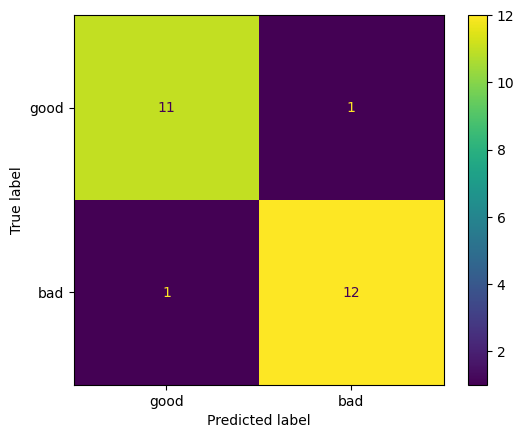

In [476]:
cm = confusion_matrix(y_test, y_pred, labels=['good', 'bad'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['good', 'bad'])
disp.plot()

### Vectorization function

In [477]:
def text_preprocess_vectorize(texts, vectorizer=None):
    processed_texts = []
    for text in texts:
        text = text.lower()
        text = re.sub(f"[{string.punctuation}]", "", text)
        text = re.sub(r'\d+', '', text)
        processed_texts.append(text)

    if vectorizer is None:
        vectorizer = TfidfVectorizer(stop_words='english')

    vectors = vectorizer.fit_transform(processed_texts)
    return vectors, vectorizer

In [478]:
def plot_tfidf_vectors(vectors, vectorizer, texts, threshold=0.1):
    feature_names = vectorizer.get_feature_names_out()
    tfidf_matrix = pd.DataFrame(vectors.toarray(), columns=feature_names)
    print("\nTF-IDF Matrix:")
    print(tfidf_matrix)

    for idx, vector in enumerate(vectors):
        vector_dense = vector.toarray().flatten()
        significant_indices = np.where(vector_dense > threshold)[0]
        significant_features = [feature_names[i] for i in significant_indices]
        significant_values = vector_dense[significant_indices]

        plt.figure(figsize=(8, 4))
        plt.barh(significant_features, significant_values, color='skyblue')
        plt.xlabel('TF-IDF Score')
        plt.title(f'TF-IDF Features for Text {idx+1}')
        plt.gca().invert_yaxis()
        plt.show()

#### Example usage


TF-IDF Matrix:
   advertised   amazing   average       bad  beautiful       bit     broke  \
0    0.000000  0.459229  0.000000  0.000000   0.000000  0.459229  0.000000   
1    0.000000  0.000000  0.000000  0.306631   0.000000  0.000000  0.373934   
2    0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  0.000000   0.435918  0.000000  0.000000   
4    0.000000  0.000000  0.429767  0.352415   0.000000  0.000000  0.000000   
5    0.389034  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   

     buying  customer    design  ...  perfectly   product   quality   service  \
0  0.000000  0.000000  0.000000  ...   0.000000  0.235275  0.317930  0.000000   
1  0.373934  0.000000  0.000000  ...   0.000000  0.000000  0.258879  0.000000   
2  0.000000  0.000000  0.000000  ...   0.000000  0.238684  0.000000  0.382030   
3  0.000000  0.000000  0.435918  ...   0.435918  0.223332  0.000000  0.000000   
4  0.000000  0.000000  0.000000 

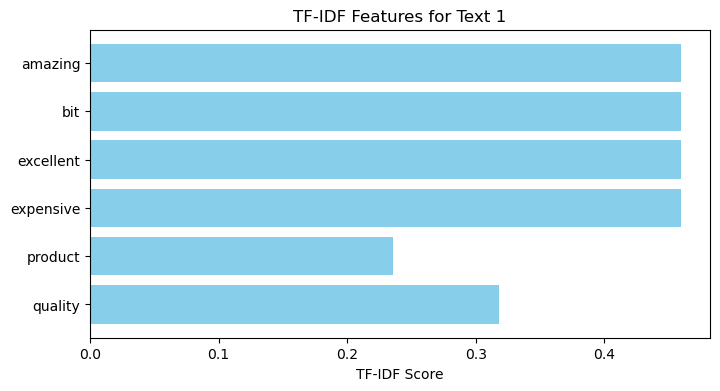

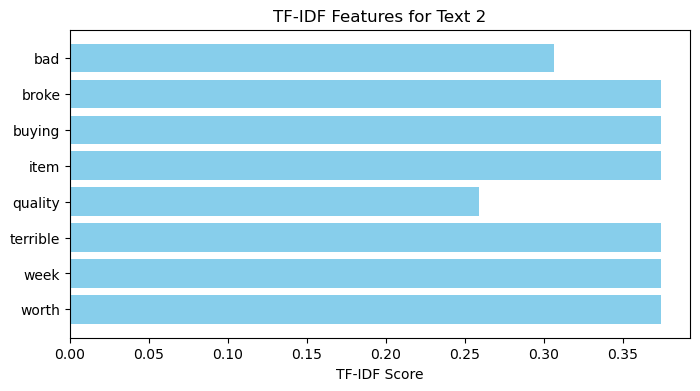

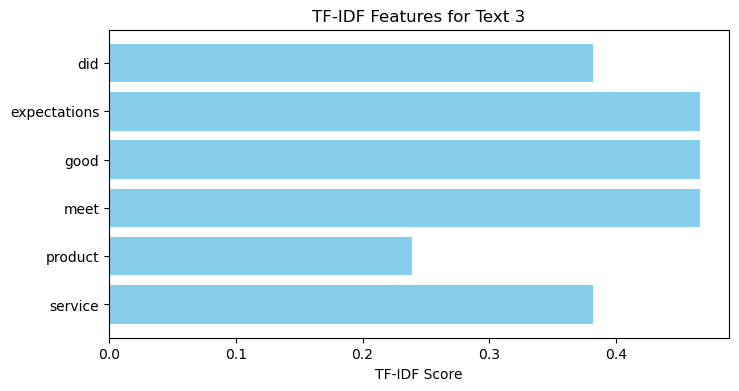

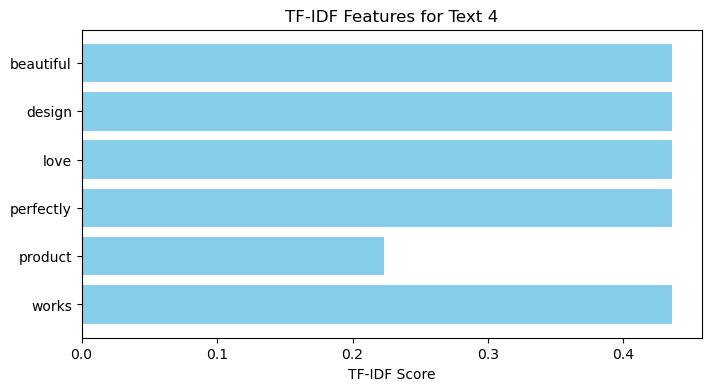

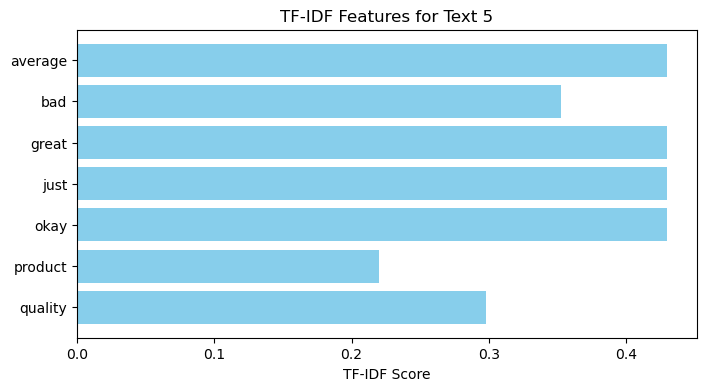

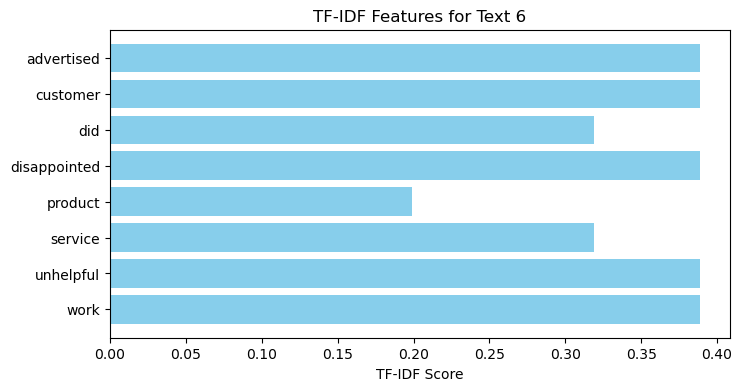

In [479]:
sample_texts = ["This product is amazing and the quality is excellent but I found it a bit expensive",
                "Terrible item, not worth buying, the quality is bad and it broke after a week",
                "The service was good, but the product did not meet my expectations",
                "I love this product, it works perfectly and the design is beautiful",
                "The product is okay, not great but not bad either, just average quality",
                "I am disappointed with the product, it did not work as advertised and the customer service was unhelpful"]

sample_vectors, vectorizer = text_preprocess_vectorize(sample_texts)
plot_tfidf_vectors(sample_vectors, vectorizer, sample_texts)
